In [1]:
#LINEAR REGRESSION WITH SCI-KIT LEARN

In [20]:
import matplotlib.pyplot as  plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#Load the diabetes dataset
diabetes=datasets.load_diabetes()

In [6]:
#Select only one feature
diabetes_X = diabetes.data[:, np.newaxis,2]

In [7]:
#Split into train/test sets
diabetes_X_train=diabetes_X[:-20]
diabetes_X_test=diabetes_X[-20:]

In [9]:
#Splitting outcome var (y) into train/test
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [11]:
#Create lm object
lm=linear_model.LinearRegression()

In [12]:
#Lets train the model
lm.fit(diabetes_X_train,diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#Lets make prediction
diabetes_y_pred= lm.predict(diabetes_X_test)

In [14]:
#The coefficients
print('Coefficients: \n', lm.coef_)
# MSE
print('Mean Squared Error: %.2f'
     % mean_squared_error(diabetes_y_test,diabetes_y_pred))
# Explained variance score: 1 is a perfect prediction (R2 how good lm performed)
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

#Only 42% of the variance contained in the the dataset is explained by the model, in other words it is not performing good.
#Yet, MSE veryhigh is another indicator of bad performances

Coefficients: 
 [938.23786125]
Mean Squared Error: 2548.07
Variance score: 0.47


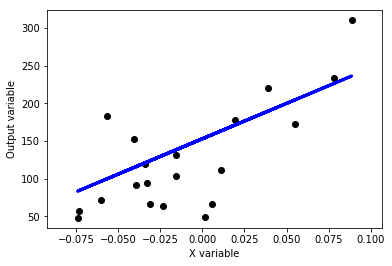

In [26]:
#Plot Outputs
#Create scatterplot
plt.scatter(diabetes_X_test, diabetes_y_test, Color='black')

#create regression line 
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xlabel('X variable')
plt.ylabel('Output variable')
plt.xticks()
plt.yticks()

plt.show()

In [27]:
                                      
                                    #LOGISTIC REGRESSION WITH SCIKIT LEARN
    
    

In [28]:
import matplotlib.pyplot as  plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
#Import the Iris dataset 
iris= datasets.load_iris()
X=iris.data[:,:2] #using only 2 feature
Y=iris.target #exstracting the output var

#Creating the logreg function
logreg=LogisticRegression(C=15, solver='lbfgs', multi_class='multinomial')

In [31]:
#Fitting a Logreg on the X vars and Y output
logreg.fit(X,Y)

LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
#Plot decision boundary. Assignind a point for each possible outcome
x_min, x_max= X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max= X[:,1].min() -.5, X[:,1].max() + .5
h= 0.02 #step size
xx , yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

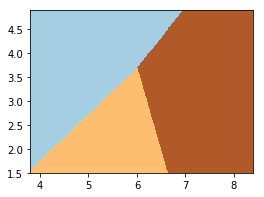

In [43]:
#Put the results in a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

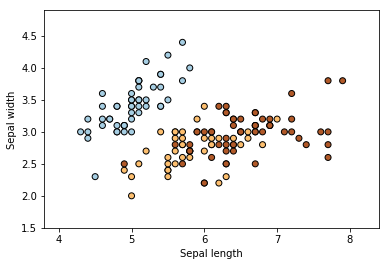

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()